# 🍷 Wine Quality Prediction – End-to-End ML Project

# 📌 TASK 1: Load and Understand the Dataset

## 🔹 Import the libraries
We import libraries like
- ```pandas and numpy``` for data handling
- ```seaborn and matplotlib``` for visualization
- ```scikit-learn``` for building machine learning models
These libraries are essential for the complete ML workflow.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#🔹 Load the Dataset

The dataset is loaded using ```pd.read_csv()``` and stored in a DataFrame.
This allows us to easily explore, manipulate, and analyze the data.

In [28]:
df = pd.read_csv("winequality.csv")

# 🔹 Display First 5 Rows
This shows the first few records of the dataset to understand the structure, column names, and sample values present in the data.

In [29]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#🔹 Display Last 5 Rows

This helps verify that the dataset is properly loaded till the end and checks for any irregularities in the last entries.

In [30]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


#🔹 Display Random Rows
Random rows give an unbiased view of the dataset and help ensure that data is well distributed.

In [31]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1153,9.6,0.42,0.35,2.1,0.083,17.0,38.0,0.99622,3.23,0.66,11.1,6
750,8.3,0.65,0.10,2.9,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5
55,7.7,0.62,0.04,3.8,0.084,25.0,45.0,0.99780,3.34,0.53,9.5,5
1546,7.0,0.57,0.02,2.0,0.072,17.0,26.0,0.99575,3.36,0.61,10.2,5
1393,8.0,0.52,0.25,2.0,0.078,19.0,59.0,0.99612,3.30,0.48,10.2,5


# 📌 TASK 2: Basic Data Inspection
# 🔹 View Column Names

This displays all the feature names present in the dataset, helping us understand what chemical properties are available for prediction.

In [32]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#🔹 Check Dataset Shape
Shows the total number of rows (wine samples) and columns (features), which helps understand dataset size.

In [33]:
df.shape

(1599, 12)

#🔹 Dataset Information
Provides data types of each column and confirms whether there are missing or null values in the dataset.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# 🔹 Statistical Summary
Displays summary statistics such as mean, minimum, maximum, and standard deviation, helping identify value ranges and outliers.

In [35]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 📌 TASK 3: Missing Values Analysis
## 🔹 Check Missing Values
Checks each cell in the dataset for missing values and returns True or False accordingly.

In [36]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


#🔹 Total Missing Values
Counts the number of missing values in each column. This helps decide whether data cleaning is required before model training.

In [37]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


# 📌 TASK 4: Exploratory Data Analysis (EDA)
## 🔹 Quality Value Counts
Counts how many wines belong to each quality score, helping understand class distribution.

In [38]:
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


##🔹 Count Plot of Quality
Visually shows the distribution of wine quality scores. It highlights class imbalance in the dataset.

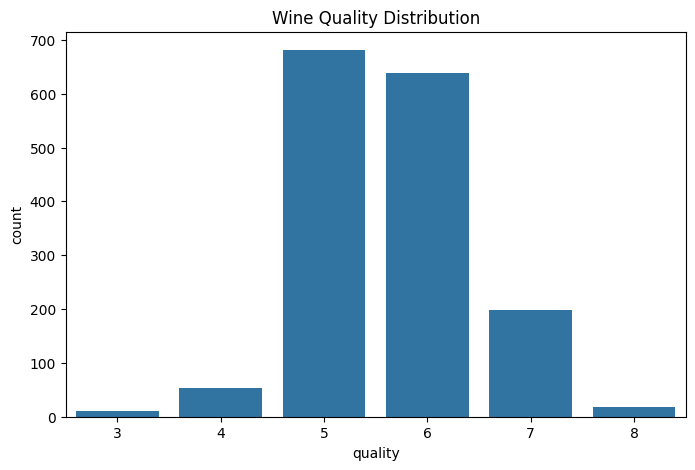

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df)
plt.title("Wine Quality Distribution")
plt.show()

# 📌 TASK 5: Binary Classification Conversion
##🔹 Create ```quality_label```
A new column is created to convert quality scores into binary labels: good or bad wine, making the problem more practical.


In [40]:
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df[['quality', 'quality_label']].head()

,quality,quality_label
0,5,0
1,5,0
2,5,0
3,6,0
4,5,0


##TASK 6: Feature & Target Separation
#🔹 Feature and Target Split
Input features are separated from the target variable to ensure the model learns only from chemical properties.

#🔹 Remove Original Quality Column
Removing the original quality column prevents data leakage and ensures fair model evaluation.

In [41]:
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

##📌 TASK 7: Train–Test Split
##🔹 Split Data

Explanation:
The dataset is split into training and testing sets so that model performance can be evaluated on unseen data.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#📌 TASK 8: Feature Scaling
##🔹 StandardScaler
Scaling ensures all features are on the same scale, improving performance for distance-based and gradient-based models.

##🔹 Fit on Train, Transform on Test
Scaler is fitted only on training data to avoid data leakage and then applied to test data.

In [43]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##📌 TASK 9: Model Training
#🔹 Model Initialization
Multiple machine learning models are initialized to compare their performance on the same dataset.

#🔹 Model Training and Prediction
Each model is trained using appropriate data and evaluated using accuracy on test data.

#🔹 Model Working Explanation
Each algorithm uses a different learning approach, which affects how well it captures patterns in the data.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [45]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

In [46]:
results = {}

for name, model in models.items():
    if name in ["Logistic Regression", "KNN", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    results[name] = accuracy_score(y_test, y_pred)

##📌 TASK 10: Model Evaluation
##🔹 Accuracy Calculation
Accuracy measures how many predictions the model got correct out of total predictions.

##🔹 Comparison Table
A table is created to compare performance of all models and identify the best one.

In [47]:
results_df = pd.DataFrame({
    "Model": results.keys(),
    "Accuracy": results.values()
})

results_df

,Model,Accuracy
0,Logistic Regression,0.865625
1,KNN,0.881250
2,Decision Tree,0.890625
3,Random Forest,0.893750
4,SVM,0.875000


#📌 TASK 11: Pipeline & Hyperparameter Tuning
##🔹 Create Pipeline
Pipeline automates preprocessing and model training, reducing errors and ensuring consistency.

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [49]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

In [50]:
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf']
}

#🔹 GridSearchCV
GridSearchCV finds the best hyperparameter values by testing multiple combinations using cross-validation.

In [51]:
grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)

grid.best_params_

{'svm__C': 10, 'svm__kernel': 'rbf'}

It tells us how well the tuned model is expected to perform on unseen data.

In [52]:
grid.best_score_

np.float64(0.8944424019607844)

#🔹 Project Conclusion
This project demonstrates the complete machine learning lifecycle, from data understanding to model optimization, similar to real-world industry applications.